## Assignment 4 - Python Assignemt

I opened all 3 files in a notepad first to see what the data looked like before deciding how to import them. This is the approach I used to calculate the data.

- u.data was a tab delimited table that was left as default for import
- u.item was separated with pipes, whih i replaced with commas and saved the file as a CSV
- u.user was separated with pipes, whih i replaced with commas and saved the file as a CSV


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb

sb.set_style('whitegrid')
rcParams['figure.figsize'] = 20,8

In [2]:
add_data = 'C:\\Users\\Charbel\Desktop\\Udemy\\2021 Data Science - MachineLearning Project Deployment Mastery\\ml-100k\\u.data'
add_item = 'C:\\Users\\Charbel\Desktop\\Udemy\\2021 Data Science - MachineLearning Project Deployment Mastery\\ml-100k\\u_item.csv'
add_user = 'C:\\Users\\Charbel\Desktop\\Udemy\\2021 Data Science - MachineLearning Project Deployment Mastery\\ml-100k\\u_user.csv'

In [51]:
u_data = pd.read_table(add_data, names = ['user_id', 'movie_id', 'rating', 'timestamp'])

u_data.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
u_item = pd.read_csv(add_item, names = ['movie id' , 'movie title' , 'release date' , 'video release date' ,
              'IMDb URL' , 'unknown' , 'Action' , 'Adventure' , 'Animation' ,
              'Children\'s' , 'Comedy' , 'Crime' , 'Documentary' , 'Drama' , 'Fantasy' ,
              'Film-Noir' , 'Horror' , 'Musical' , 'Mystery' , 'Romance' , 'Sci-Fi' ,
              'Thriller' , 'War' ,'Western'] )
u_item.head()

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,,http://us.imdb.com/M/title-exact?Copycat%20(19...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [5]:
# Create seperate columns for the day, month and year of release

release_year = []
release_month = []
release_day = []

for i in range(len(u_item['release date'])):
    a = u_item['release date'][i][-5:-1]
    release_year.append(a)
    b = u_item['release date'][i][-9:-6]
    release_month.append(b)
    c = u_item['release date'][i][0:2]
    release_day.append(c)
    
u_item['release_year'] = release_year
u_item['release_month'] = release_month
u_item['release_day'] = release_day

u_item.sort_values(by = 'release_year', ascending = True, inplace = True)

u_item.head()

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release_year,release_month,release_day
266,267,unknown,,,,1,0,0,0,0,...,0,0,0,0,0,0,0,,,
674,675,Nosferatu (Nosferatu eine Symphonie des Graue...,01-Jan-1922,,http://us.imdb.com/M/title-exact?Nosferatu %20...,0,0,0,0,0,...,0,0,0,0,0,0,0,1922,Jan,01
1541,1542,Scarlet Letter The (1926),01-Jan-1926,,http://us.imdb.com/M/title-exact?Scarlet%20Let...,0,0,0,0,0,...,0,0,0,0,0,0,0,1926,Jan,01
616,617,Blue Angel The (Blaue Engel Der) (1930),01-Jan-1930,,http://us.imdb.com/M/title-exact?Blaue%20Engel...,0,0,0,0,0,...,0,0,0,0,0,0,0,1930,Jan,01
655,656,M (1931),01-Jan-1931,,http://us.imdb.com/M/title-exact?M%20(1931),0,0,0,0,0,...,0,0,0,0,1,0,0,1931,Jan,01


In [44]:
u_user = pd.read_csv(add_user, names = ['user_id', 'age', 'gender', 'occupation', 'zip code'])

u_user

,user_id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


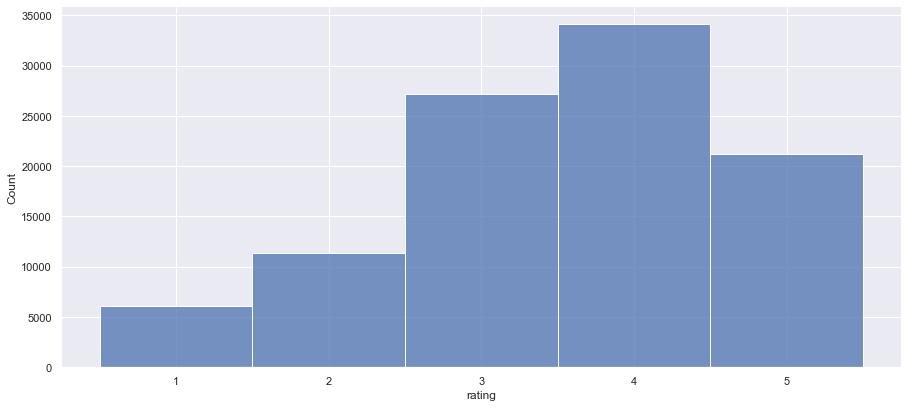

In [7]:
sb.set(rc = {'figure.figsize':(15,8)})
sb.displot(u_data['rating'], bins = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5])
plt.gcf().set_size_inches(15, 6)

<Figure size 1440x576 with 0 Axes>

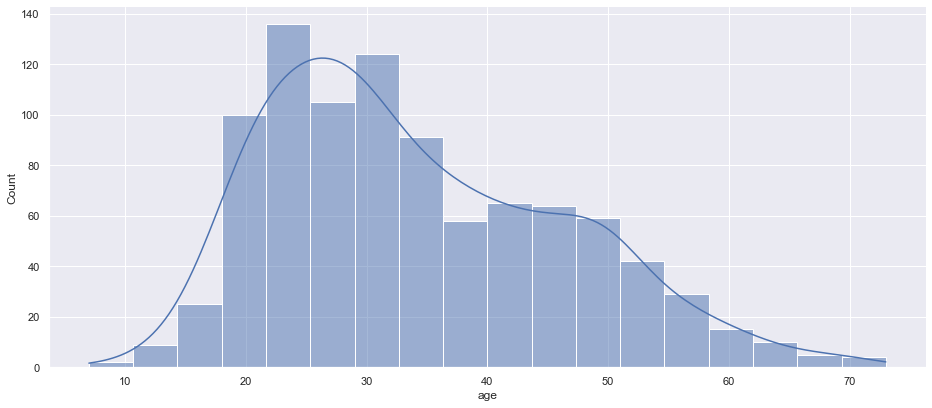

In [8]:
plt.figure(figsize = (20,8))
sb.displot(u_user['age'], kde = True)
plt.gcf().set_size_inches(15, 6)

<Figure size 1440x576 with 0 Axes>

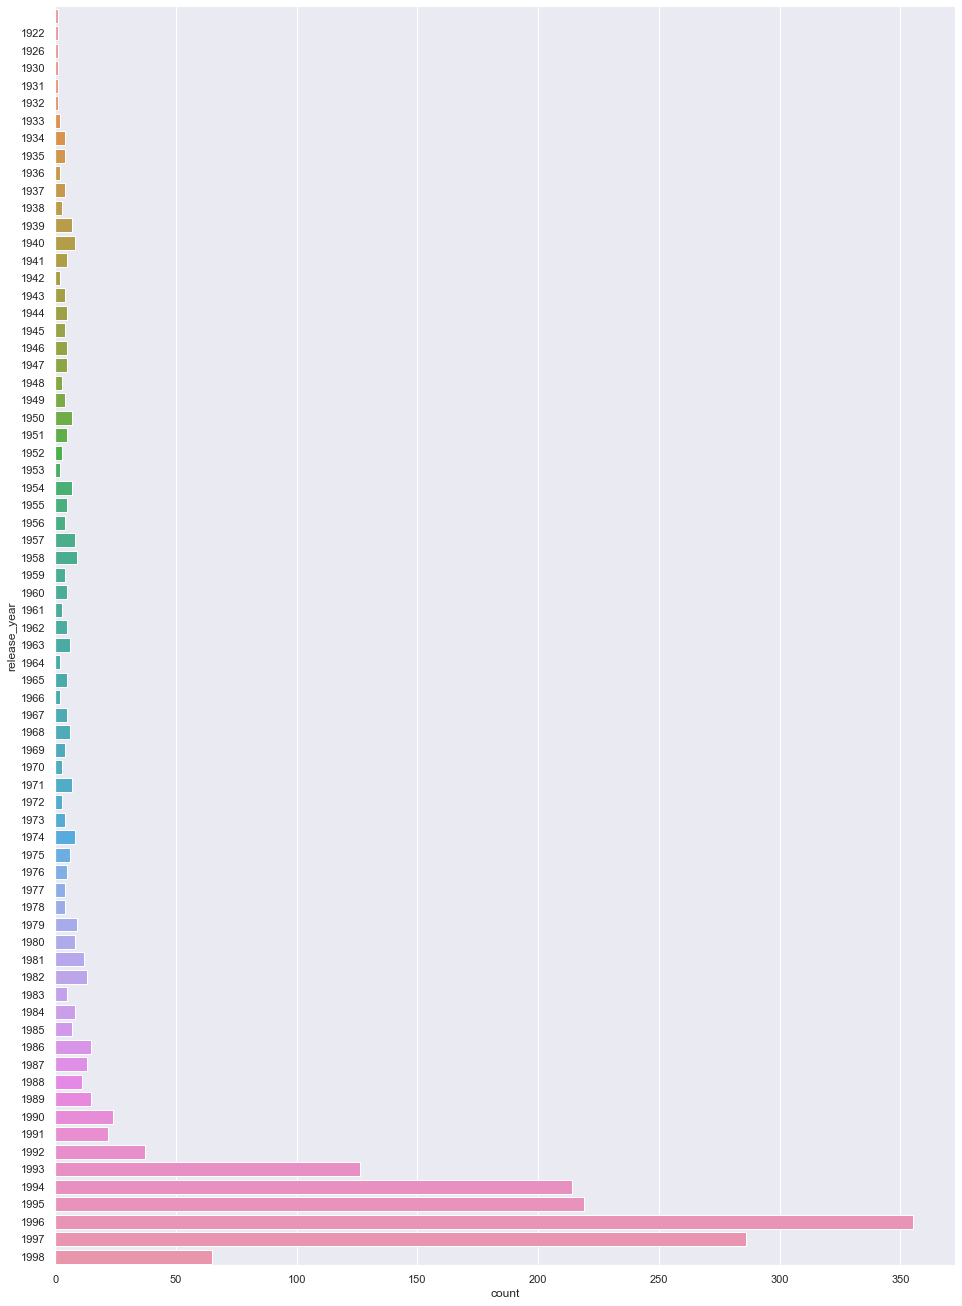

In [9]:
plt.figure(figsize = (20,8))
sb.catplot(y = 'release_year', data = u_item, kind = 'count')
plt.gcf().set_size_inches(15, 20)

#### Prior to the mid-1990's, the actual release date may not have been known. Therefore, a default date of January 01 was chosen for that particular year. I found it necessary to only plot release date by the year instead of exact date.

<Figure size 1440x576 with 0 Axes>

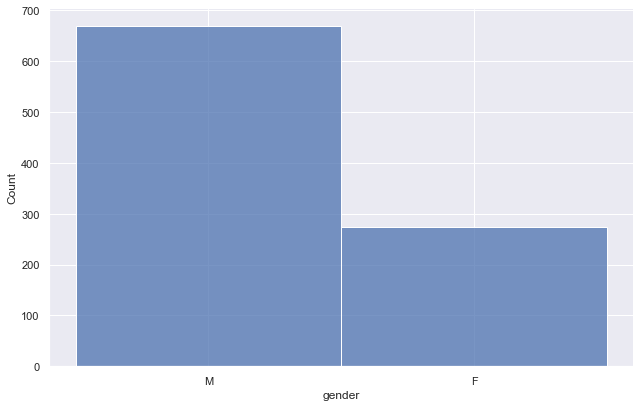

In [10]:
plt.figure(figsize = (20,8))
sb.displot(u_user['gender'])
plt.gcf().set_size_inches(10, 6)

<Figure size 1440x576 with 0 Axes>

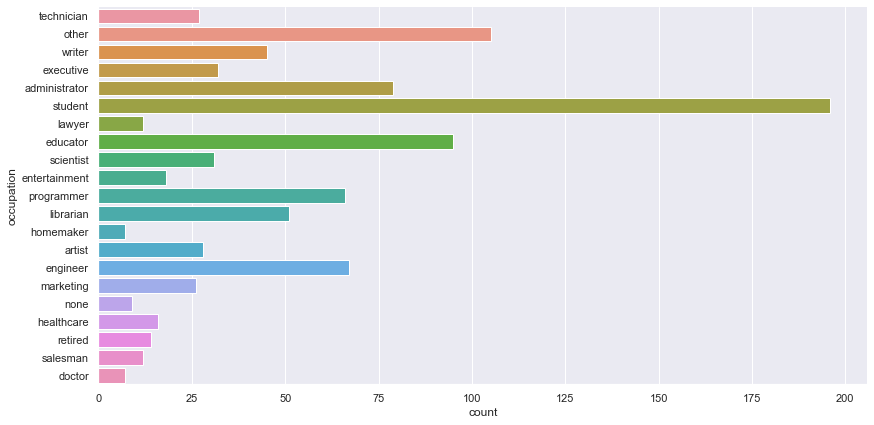

In [11]:
plt.figure(figsize = (20,8))
sb.catplot(y = 'occupation', data = u_user, kind = 'count')
plt.gcf().set_size_inches(15, 6)

### How has the popularity of movie genres changed over the years?

In [12]:
new_item = u_item.groupby('release_year').sum()
new_item.drop('',axis = 0, inplace = True) # Drop rows with no release year defined (Only 1 row was found)
new_item


,movie id,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,,
1922,675,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1926,1542,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1930,617,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1931,656,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
1932,1124,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,189000,0,30,13,4,15,82,8,9,97,3,0,8,2,2,35,7,25,7,6
1995,183514,0,40,22,6,21,63,11,5,89,3,1,14,3,5,37,15,39,5,2
1996,322295,0,44,24,9,21,108,21,18,170,6,1,11,9,6,38,15,47,9,2


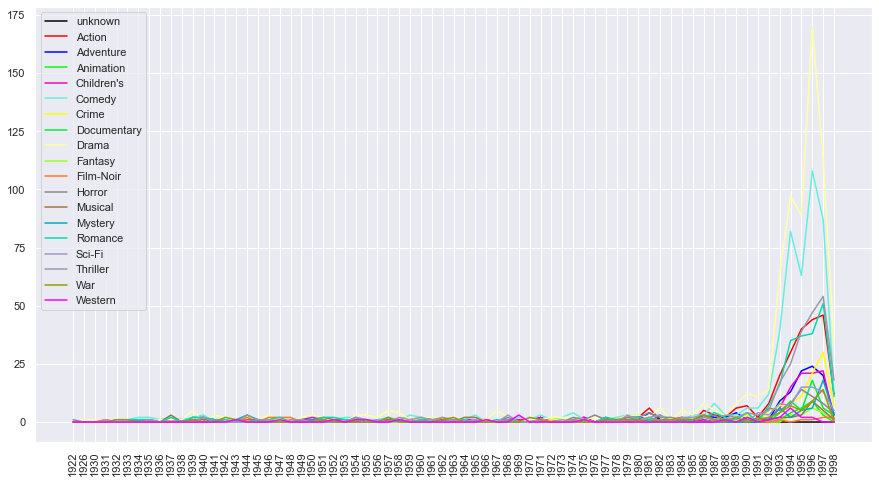

In [13]:
plt.plot(new_item['unknown'], label = 'unknown', color = '#000000')
plt.plot(new_item['Action'], label = 'Action', color = '#FF0000')
plt.plot(new_item['Adventure'], label = 'Adventure', color = '#0000FF')
plt.plot(new_item['Animation'], label = 'Animation', color = '#00FF00')
plt.plot(new_item['Children\'s'], label = 'Children\'s', color = '#FF00BB')
plt.plot(new_item['Comedy'], label = 'Comedy', color = '#66EEDD')
plt.plot(new_item['Crime'], label = 'Crime', color = '#FFFF00')
plt.plot(new_item['Documentary'], label = 'Documentary', color = '#00EE33')
plt.plot(new_item['Drama'], label = 'Drama', color = '#FFFFAA')
plt.plot(new_item['Fantasy'], label = 'Fantasy', color = '#99FF22')
plt.plot(new_item['Film-Noir'], label = 'Film-Noir', color = '#FF7722')
plt.plot(new_item['Horror'], label = 'Horror', color = '#888888')
plt.plot(new_item['Musical'], label = 'Musical', color = '#997744')
plt.plot(new_item['Mystery'], label = 'Mystery', color = '#00AABB')
plt.plot(new_item['Romance'], label = 'Romance', color = '#00DDAA')
plt.plot(new_item['Sci-Fi'], label = 'Sci-Fi', color = '#9999CC')
plt.plot(new_item['Thriller'], label = 'Thriller', color = '#9999AA')
plt.plot(new_item['War'], label = 'War', color = '#999900')
plt.plot(new_item['Western'], label = 'Western', color = '#FF00FF')

x = new_item.index

plt.xticks(x, rotation = 'vertical')

plt.legend()

The top 2 genres created after 1990 are dramas and comedies. However, there does not seem to be a distinction between either of these genres and the hybrid genre known as "Dramadies" which could be categorized as either one.

### Display top 25 films

In [18]:
# Identify the movies that have more than 100 ratings and make a list of the movie ID's
num_of_ratings = u_data['movie_id'].value_counts()>100
num_of_ratings = num_of_ratings[num_of_ratings == True]
high_ratings = list(num_of_ratings.index)
len(high_ratings)

334

There are 334 movies that have more than 100 ratings associated with them

In [19]:
# in the original dataset, extract the rows that have more than 100 ratings, then group them and calculate the mean rating

rating_list = u_data.loc[u_data['movie_id'].isin(high_ratings)]
rating_list

grouped = rating_list.groupby(['movie_id']).mean().round(2)
grouped.shape

(334, 3)

In [20]:
movie_list = u_item.loc[u_item['movie id'].isin(high_ratings)]
movie_list.sort_values('movie id', inplace = True)
movie_list

ave_rating = list(grouped['rating'])
movie_list['ave_rating'] = ave_rating
movie_list

top_movies = movie_list.sort_values(['ave_rating'], ascending = False)
top_movies.drop(labels = ['release date', 'video release date','unknown' , 'Action' , 'Adventure' , 'Animation' ,
              'Children\'s' , 'Comedy' , 'Crime' , 'Documentary' , 'Drama' , 'Fantasy' ,
              'Film-Noir' , 'Horror' , 'Musical' , 'Mystery' , 'Romance' , 'Sci-Fi' ,
              'Thriller' , 'War' ,'Western'], axis = 1, inplace = True )
top_movies.head(25)

<ipython-input-20-e2bd8ab8d592>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_list.sort_values('movie id', inplace = True)
<ipython-input-20-e2bd8ab8d592>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_list['ave_rating'] = ave_rating


,movie id,movie title,IMDb URL,release_year,release_month,release_day,ave_rating
407,408,Close Shave A (1995),http://us.imdb.com/M/title-exact?Close%20Shave...,1996,Apr,28,4.49
168,169,Wrong Trousers The (1993),http://us.imdb.com/M/title-exact?Wrong%20Trous...,1993,Jan,01,4.47
317,318,Schindler's List (1993),http://us.imdb.com/M/title-exact?Schindler's%2...,1993,Jan,01,4.47
482,483,Casablanca (1942),http://us.imdb.com/M/title-exact?Casablanca%20...,1942,Jan,01,4.46
63,64,Shawshank Redemption The (1994),http://us.imdb.com/M/title-exact?Shawshank%20R...,1994,Jan,01,4.45
602,603,Rear Window (1954),http://us.imdb.com/M/title-exact?Rear%20Window...,1954,Jan,01,4.39
11,12,Usual Suspects The (1995),http://us.imdb.com/M/title-exact?Usual%20Suspe...,1995,Aug,14,4.39
49,50,Star Wars (1977),http://us.imdb.com/M/title-exact?Star%20Wars%2...,1977,Jan,01,4.36
177,178,12 Angry Men (1957),http://us.imdb.com/M/title-exact?12%20Angry%20...,1957,Jan,01,4.34
426,427,To Kill a Mockingbird (1962),http://us.imdb.com/M/title-exact?To%20Kill%20a...,1962,Jan,01,4.29


## Determine the gender demographics of specific genres

### Dramas (Male versus Female)

In [48]:
drama_vs_gender = u_user
drama_vs_gender['movies_seen'] = movies_seen

drama_vs_gender.groupby('gender').sum()


,user_id,age,movies_seen
gender,,,
F,131424,9231,11350
M,313672,22880,28545


In [54]:
dramas = u_item[u_item['Drama'] == 1]

dramas.drop(labels = ['release date', 'video release date','unknown' , 'Action' , 'Adventure' , 'Animation' ,
              'Children\'s' , 'Comedy' , 'Crime' , 'Documentary', 'Fantasy' ,'Film-Noir' , 'Horror' , 'Musical' , 'Mystery' , 'Romance' , 'Sci-Fi' ,
              'Thriller' , 'War' ,'Western'], axis = 1, inplace = True )

drama_movies = list(dramas['movie id'])
len(drama_movies)

drama_viewers = u_data.loc[u_data['movie_id'].isin(drama_movies)]

users = list(drama_viewers['user_id'])

drama_viewers = pd.DataFrame(drama_viewers.value_counts('user_id')).rename(columns = {0:'movies_seen'})
drama_viewers.sort_values('user_id')
movies_seen = list(drama_viewers['movies_seen'])


drama_vs_gender = u_user
drama_vs_gender['drama movies seen'] = movies_seen

drama_vs_gender.groupby('gender').sum()

C:\Users\Charbel\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,user_id,age,movies_seen,drama movies seen
gender,,,,
F,131424,9231,11350,11350
M,313672,22880,28545,28545


Drama movies were watched 28545 times by males versus 11350 times by females

### Romance (Male versus Female)

In [56]:
romance = u_item[u_item['Romance'] == 1]

romance.drop(labels = ['release date', 'video release date','unknown' , 'Action' , 'Adventure' , 'Animation' ,
              'Children\'s' , 'Comedy' , 'Crime' , 'Documentary', 'Fantasy' ,'Film-Noir' , 'Horror' , 'Musical' , 'Mystery' , 'Drama' , 'Sci-Fi' ,
              'Thriller' , 'War' ,'Western'], axis = 1, inplace = True )

romance_movies = list(romance['movie id'])
len(romance_movies)

romance_viewers = u_data.loc[u_data['movie_id'].isin(romance_movies)]

users = list(romance_viewers['user_id'])

romance_viewers = pd.DataFrame(romance_viewers.value_counts('user_id')).rename(columns = {0:'movies_seen'})
romance_viewers.sort_values('user_id')
movies_seen = list(romance_viewers['movies_seen'])


romance_vs_gender = u_user
romance_vs_gender['romance movies seen'] = movies_seen

romance_vs_gender.groupby('gender').sum()

C:\Users\Charbel\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,user_id,age,movies_seen,drama movies seen,romance movies seen
gender,,,,,
F,131424,9231,11350,11350,5541
M,313672,22880,28545,28545,13920


Romance movies were watched 13920 times by males versus 5541 times by females



### Science Fiction (Male versus Female)

In [67]:
sci_fi = u_item[u_item['Sci-Fi'] == 1]

sci_fi.drop(labels = ['release date', 'video release date','unknown' , 'Action' , 'Adventure' , 'Animation' ,
              'Children\'s' , 'Comedy' , 'Crime' , 'Documentary', 'Fantasy' ,'Film-Noir' , 'Horror' , 'Musical' , 'Mystery' , 'Romance' , 'Drama' ,
              'Thriller' , 'War' ,'Western'], axis = 1, inplace = True )

sci_fi_movies = list(sci_fi['movie id'])
len(sci_fi_movies)

sci_fi_viewers = u_data.loc[u_data['movie_id'].isin(sci_fi_movies)]

users = list(sci_fi_viewers['user_id'])

sci_fi_viewers = pd.DataFrame(sci_fi_viewers.value_counts('user_id')).rename(columns = {0:'movies_seen'})
sci_fi_viewers.sort_values('user_id')
movies_seen = list(sci_fi_viewers['movies_seen'])
viewers = list(sci_fi_viewers.index)

sci_fi_vs_gender = u_user.loc[u_user['user_id'].isin(viewers)]
sci_fi_vs_gender['sci_fi movies seen'] = movies_seen

sci_fi_vs_gender.groupby('gender').sum()

C:\Users\Charbel\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-67-020e2bf4b6c1>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sci_fi_vs_gender['sci_fi movies seen'] = movies_seen


,user_id,age,movies_seen,drama movies seen,romance movies seen,sci_fi movies seen
gender,,,,,,
F,122834,8495,10683,10683,5214,3514
M,303102,22111,28013,28013,13656,9216


Sci-Fi movies were watched 9216 times by males versus 3514 times by females